Dataset Shape: (1470, 35)

Data Types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLeve

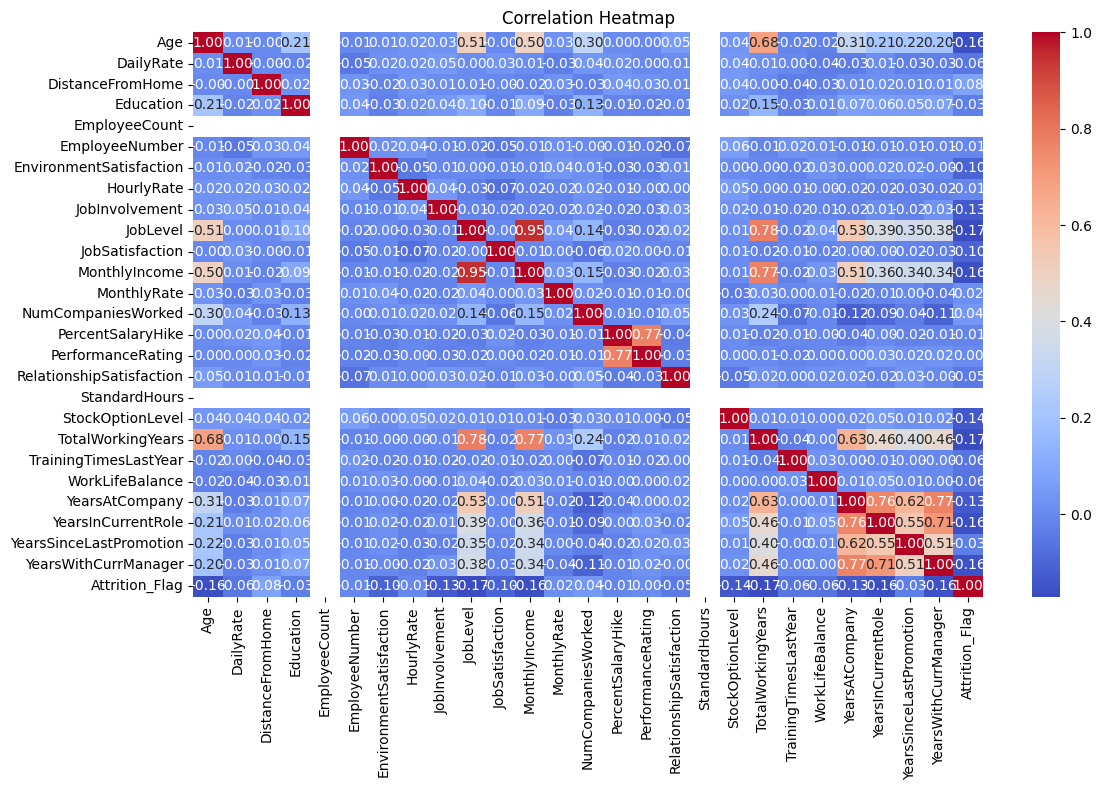

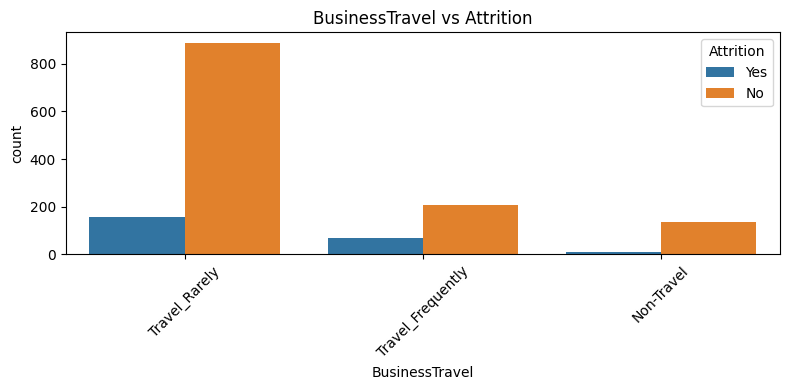

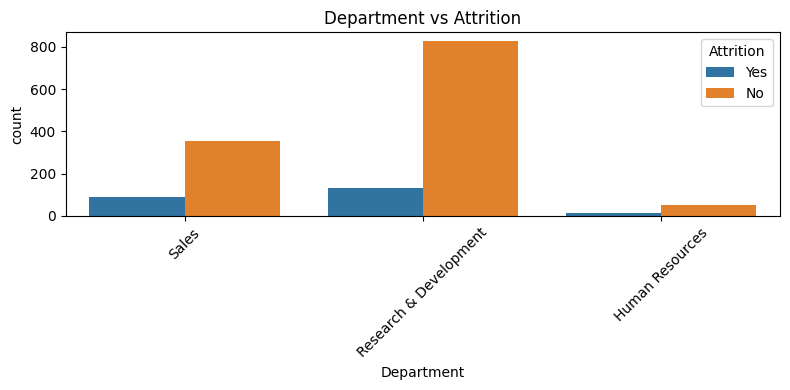

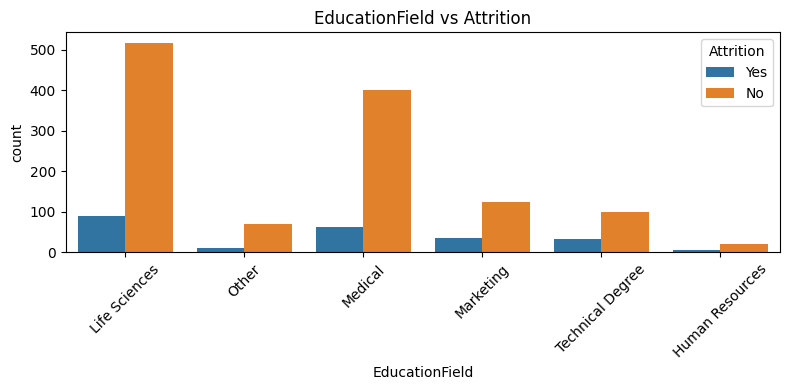

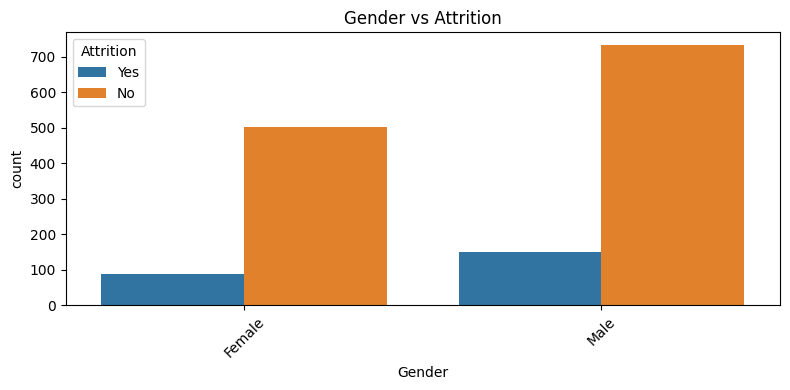

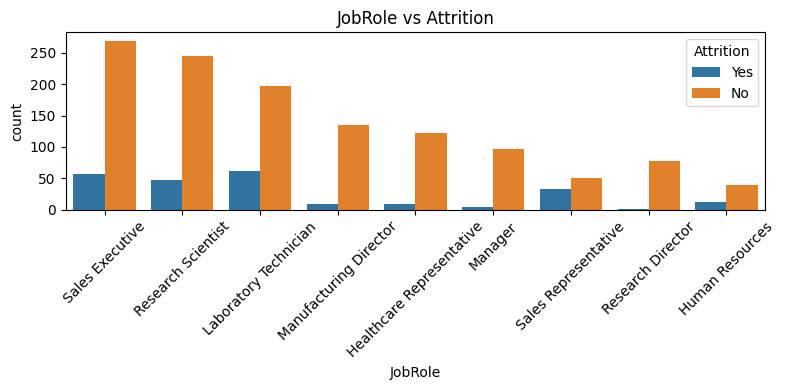

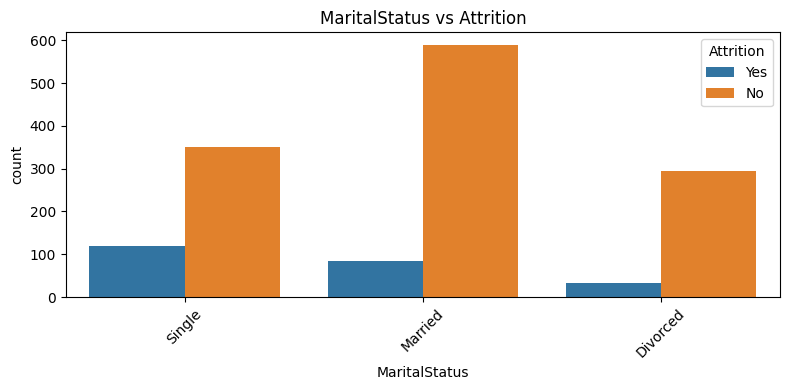

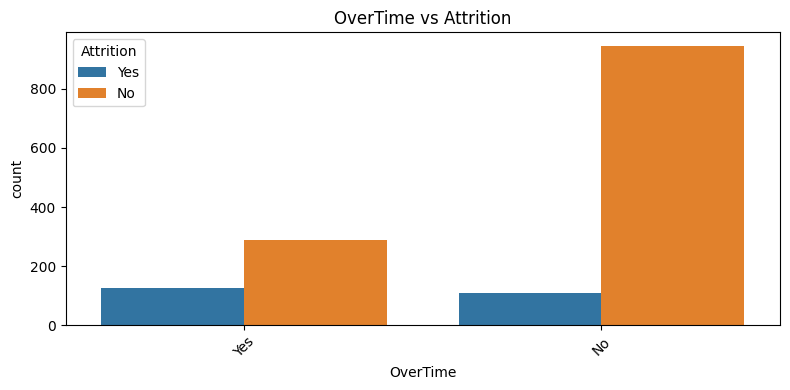

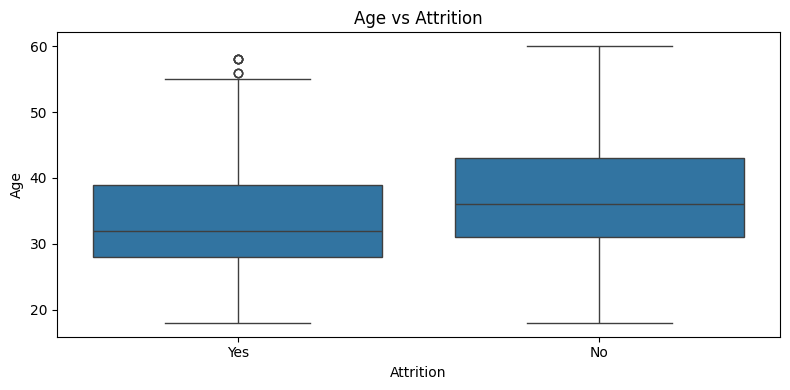

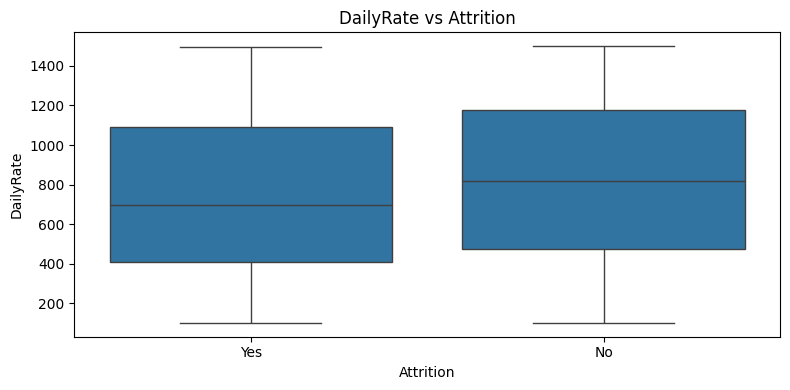

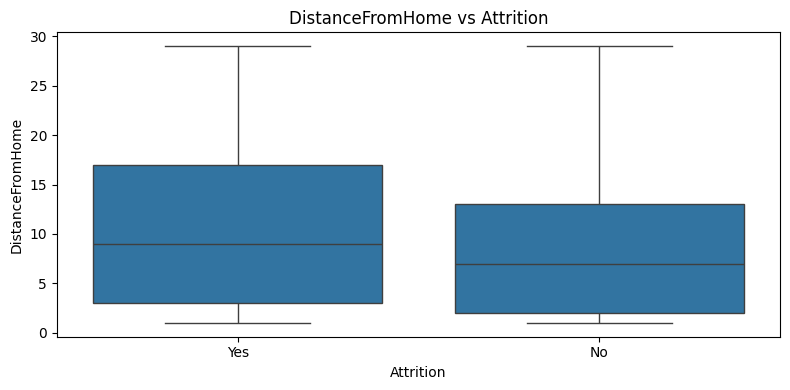

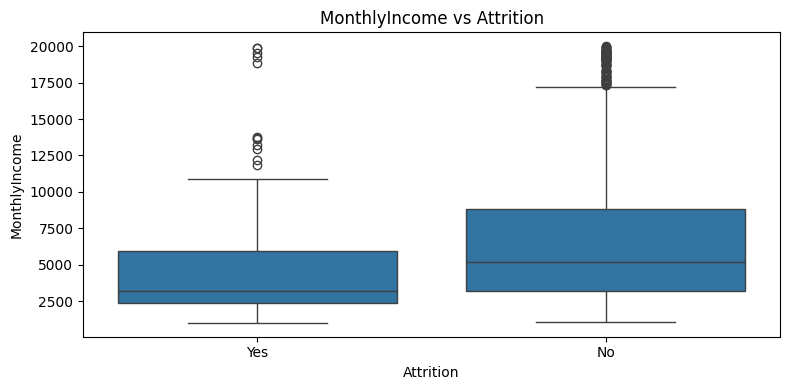

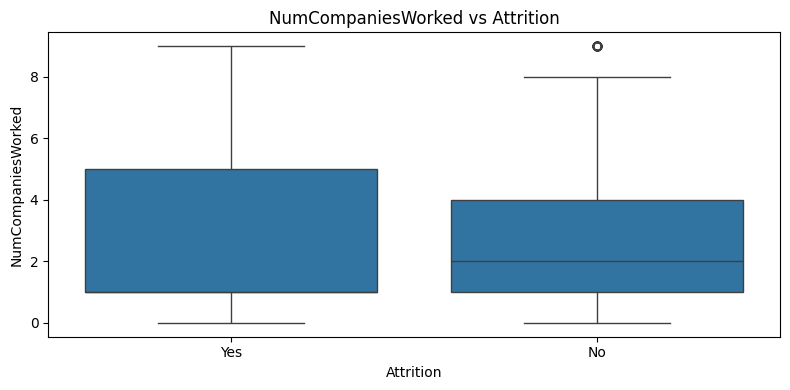

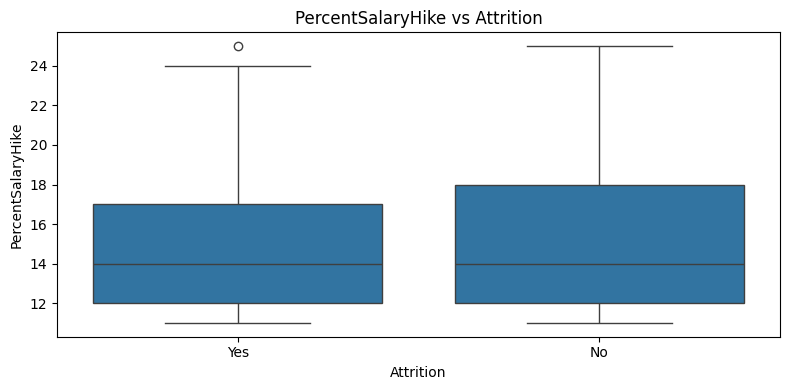

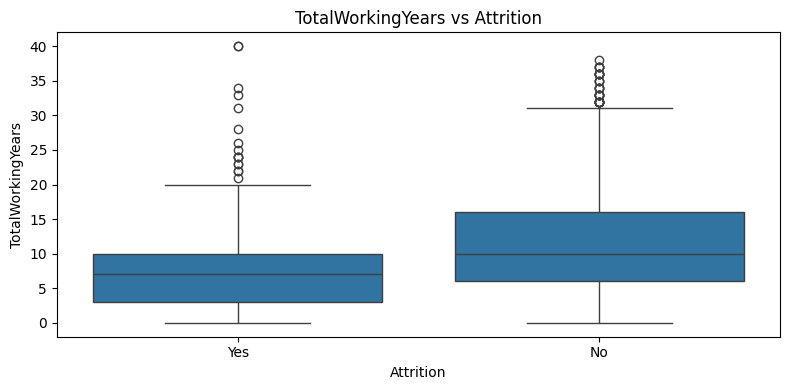

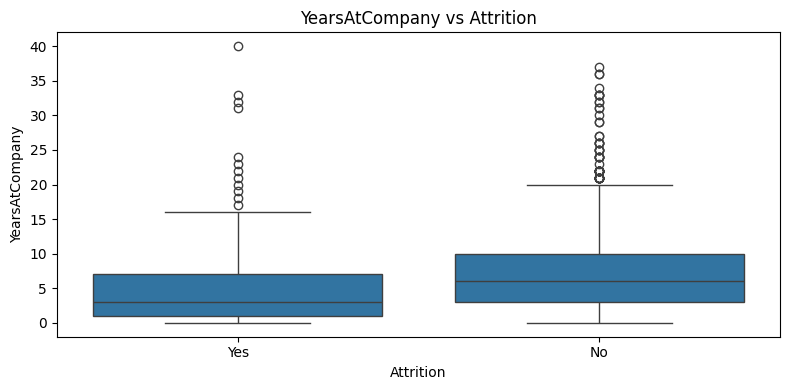

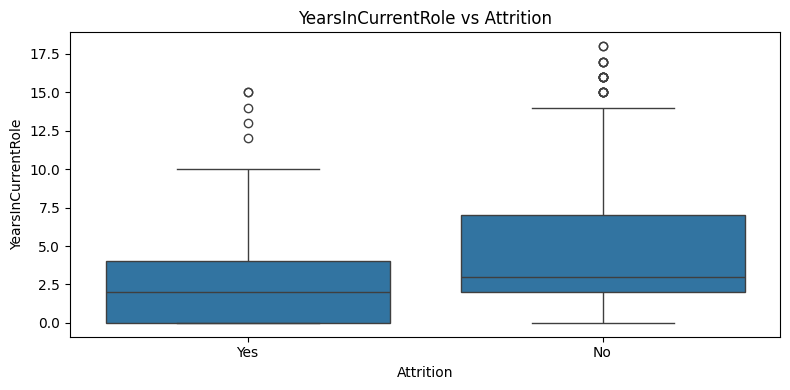

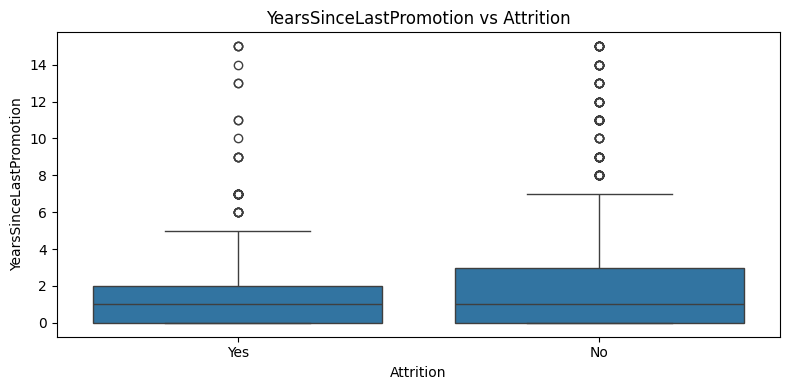


Attrition Rate by OverTime:
 OverTime
No     0.104364
Yes    0.305288
Name: Attrition_Flag, dtype: float64

Attrition Rate by Job Role:
 JobRole
Sales Representative         0.397590
Laboratory Technician        0.239382
Human Resources              0.230769
Sales Executive              0.174847
Research Scientist           0.160959
Manufacturing Director       0.068966
Healthcare Representative    0.068702
Manager                      0.049020
Research Director            0.025000
Name: Attrition_Flag, dtype: float64


In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Basic overview
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nAttrition Value Counts:\n", df['Attrition'].value_counts())

# Convert 'Attrition' to binary: Yes -> 1, No -> 0
df['Attrition_Flag'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Numerical summary
print("\nSummary statistics:\n", df.describe())

# -------------------------------
# 1. Correlation with Attrition
# -------------------------------
corr_matrix = df.corr(numeric_only=True)
attrition_corr = corr_matrix['Attrition_Flag'].sort_values(ascending=False)
print("\nCorrelation with Attrition:\n", attrition_corr)

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# -------------------------------
# 2. Countplot for categorical features
# -------------------------------
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'OverTime']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# -------------------------------
# 3. Boxplots for numeric vs Attrition
# -------------------------------
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
                  'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f'{col} vs Attrition')
    plt.tight_layout()
    plt.show()

# -------------------------------
# 4. Attrition Rate by OverTime
# -------------------------------
overtime_attrition = df.groupby('OverTime')['Attrition_Flag'].mean()
print("\nAttrition Rate by OverTime:\n", overtime_attrition)

# -------------------------------
# 5. Attrition Rate by Job Role
# -------------------------------
job_attrition = df.groupby('JobRole')['Attrition_Flag'].mean().sort_values(ascending=False)
print("\nAttrition Rate by Job Role:\n", job_attrition)



--- Logistic Regression ---
Accuracy: 0.8741496598639455
[[239   8]
 [ 29  18]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294


--- Random Forest Classifier ---
Accuracy: 0.8367346938775511
[[240   7]
 [ 41   6]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.46      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.66      0.55      0.55       294
weighted avg       0.79      0.84      0.80       294



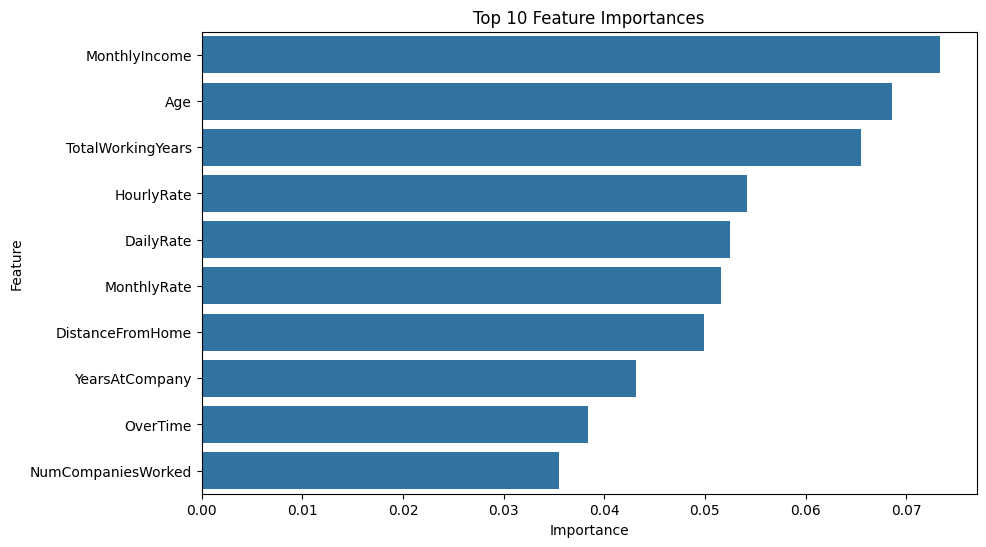

In [3]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --------------------------------
# 1. Preprocessing
# --------------------------------

# Drop irrelevant or identifier columns
df_model = df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours', 'Attrition'], axis=1)

# Encode categorical variables
le = LabelEncoder()
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = le.fit_transform(df_model[col])

# Features and target
X = df_model.drop('Attrition_Flag', axis=1)
y = df_model['Attrition_Flag']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# --------------------------------
# 2. Train Logistic Regression
# --------------------------------
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# --------------------------------
# 3. Train Random Forest
# --------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n--- Random Forest Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# --------------------------------
# 4. Feature Importance (Random Forest)
# --------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [9]:
# Train/test split + scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_train_df, X_test_df, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, stratify=y, random_state=42)






In [13]:
import shap

# SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# DO NOT TRANSPOSE — this is the correct call
shap_values = explainer.shap_values(X_train_df)

# Check if correct
print("shap_values[1] shape:", shap_values[1].shape)
print("X_train_df shape:", X_train_df.shape)



shap_values[1] shape: (30, 2)
X_train_df shape: (1176, 30)
